In [11]:
library(ggplot2)
library(data.table)

In [12]:
tab_milit <- read.csv(file="C:/Users/rafael.dourado/Desktop/DatasetMilitaresGoverno/DatasetMilitaresGoverno.csv", header=TRUE, sep=",")

In [13]:
head(tab_milit)

Nome,Patente,Origem,Orgão,Cargo,Cargo.Geral
Marcos Perdigão Bernardes,Capitão,Marinha,Caixa Econômica Federal,Assessor,Assessor
Mozart de Oliveira Farias,Brigadeiro,Aeronáutica,Caixa Econômica Federal,Assessor da presidência,Assessor
Almir Alves Junior,Capitão,Marinha,Caixa Econômica Federal,Assessor,Assessor
Juarez Aparecido de Paula Cunha,General,Exército,Correios,Presidente,Presidencia
André Luis Vieira,Coronel,Exército,Correios,Assessor especial,Assessor
Antônio Leite dos Santos Filho,General,Exército,DNIT,Diretor geral,Diretor Geral


In [14]:
str(tab_milit)

'data.frame':	48 obs. of  6 variables:
 $ Nome       : Factor w/ 48 levels "Alexandre Oliveira Fernandes",..: 36 39 3 33 5 8 4 41 22 18 ...
 $ Patente    : Factor w/ 7 levels "Almirante","Brigadeiro",..: 3 2 3 5 4 5 4 5 5 5 ...
 $ Origem     : Factor w/ 3 levels "Aeronáutica",..: 3 1 3 2 2 2 2 2 2 2 ...
 $ Orgão      : Factor w/ 23 levels "Caixa Econômica Federal",..: 1 1 1 2 2 3 3 4 5 6 ...
 $ Cargo      : Factor w/ 42 levels "A definir","Assessor",..: 2 3 2 29 4 20 19 29 29 1 ...
 $ Cargo.Geral: Factor w/ 14 levels "A Definir","Assessor",..: 2 2 2 11 2 7 7 11 11 1 ...


In [15]:
summary(tab_milit)

                              Nome          Patente           Origem  
 Alexandre Oliveira Fernandes   : 1   Almirante : 3   Aeronáutica:11  
 Alfredo Menezes                : 1   Brigadeiro: 2   Exército   :32  
 Almir Alves Junior             : 1   Capitão   : 4   Marinha    : 5  
 André Kuhn                     : 1   Coronel   :13                   
 André Luis Vieira              : 1   General   :20                   
 Antonio Carlos Moretti Bermudez: 1   Suboficial: 1                   
 (Other)                        :42   Tenente   : 5                   
                                                         Orgão   
 Ministerio da Ciência  Tecnologia  Inovações e Comunicações: 7  
 Ministério da Defesa                                       : 5  
 Ministerio Justiça e Segurança Pública                     : 5  
 Secretaria Geral                                           : 5  
 Caixa Econômica Federal                                    : 3  
 Correios                           

In [194]:
nrow(tab_milit)

[1] 48

ForçasArmadas,Qnt
Aeronáutica,11
Exército,32
Marinha,5


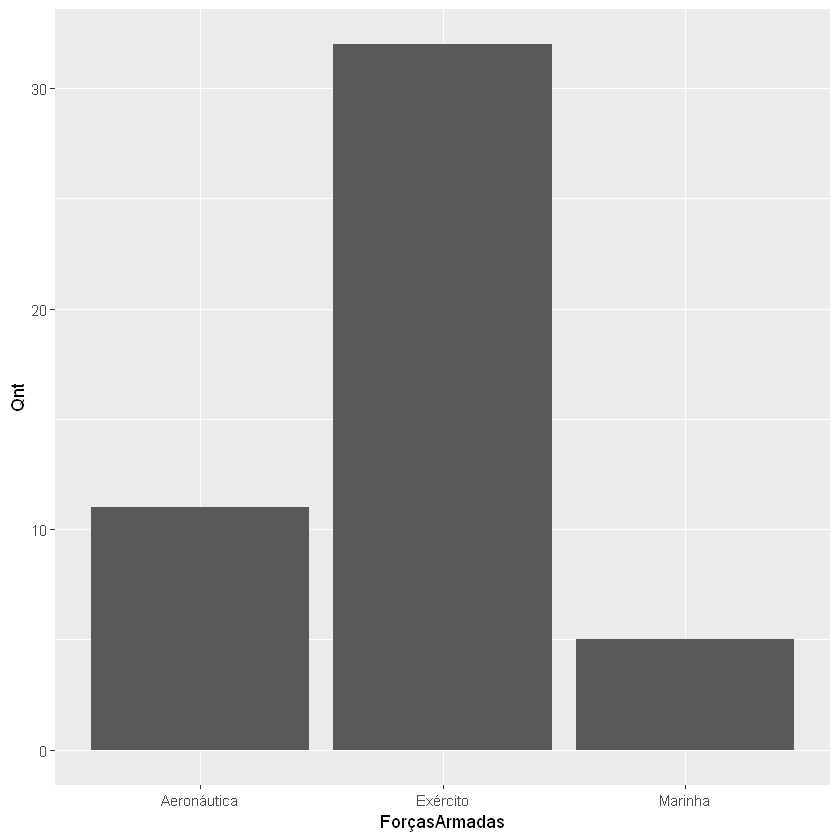

In [196]:
origem <- table(tab_milit$Origem)
fa = data.frame(origem)
names(fa) <- c("ForçasArmadas", "Qnt")

fa

ggplot(data=fa, aes(x=ForçasArmadas, y=Qnt)) + geom_bar(stat="identity")

Patente,Qnt
Almirante,3
Brigadeiro,2
Capitão,4
Coronel,13
General,20
Suboficial,1
Tenente,5


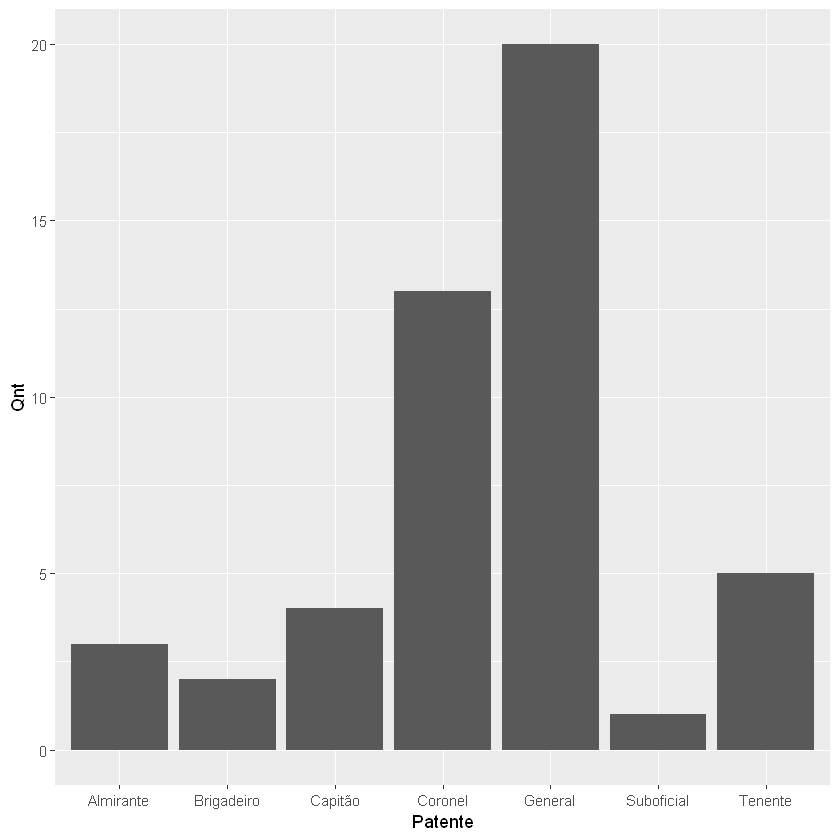

In [198]:
origem <- table(tab_milit$Patente)
pa = data.frame(origem)
names(pa) <- c("Patente", "Qnt")

pa

ggplot(data=pa, aes(x=Patente, y=Qnt)) + 
    geom_bar(stat="identity", position='dodge')

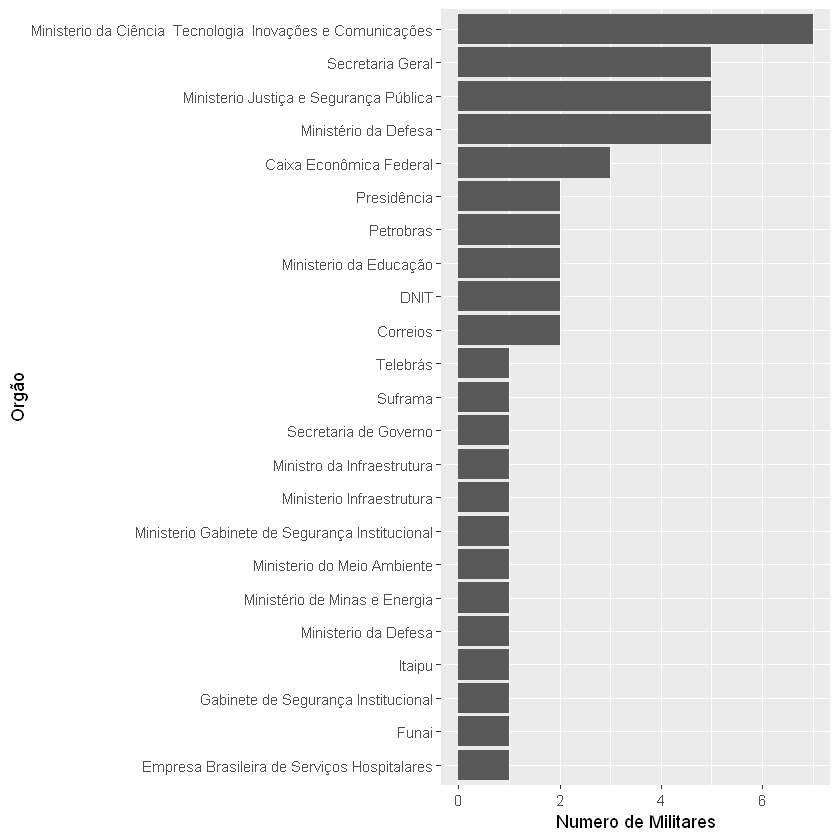

In [193]:
orgao <- table(tab_milit$Orgão)
or = data.frame(orgao)
names(or) <- c("Orgão", "Qnt")

or <- or[order(or$Qnt), ]
or$Orgão <- factor(or$Orgão, levels = or$Orgão)

ggplot(data=or, aes(x=Orgão, y=Qnt)) + 
    geom_bar(stat="identity", position='dodge') + 
    coord_flip() + 
    xlab('Orgão') + 
    ylab('Numero de Militares')

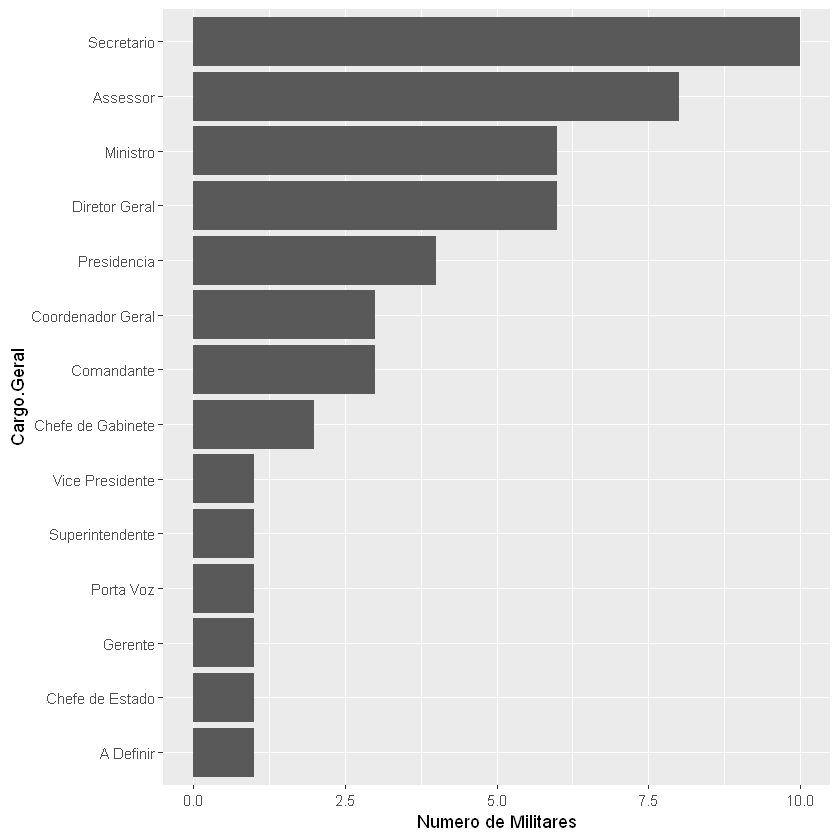

In [191]:
cargo <- table(tab_milit$Cargo.Geral)
or = data.frame(cargo)
names(or) <- c("Cargo.Geral", "Qnt")

or <- or[order(or$Qnt), ]
or$Cargo.Geral <- factor(or$Cargo.Geral, levels = or$Cargo.Geral)

ggplot(or, aes(x=or$Cargo.Geral, y=or$Qnt)) +
    geom_bar(stat="identity", position='dodge') + 
    coord_flip() + 
    xlab('Cargo.Geral') + 
    ylab('Numero de Militares')

In [143]:
tab <- table(tab_milit$Orgão, tab_milit$Patente)
td = data.frame(tab)
td$Freq <- as.numeric(as.integer(td$Freq))

matriz_correlacao <- reshape(td, v.names = "Freq", idvar = "Var1", timevar="Var2", 
direction="wide")

matriz_correlacao

Var1,Freq.Almirante,Freq.Brigadeiro,Freq.Capitão,Freq.Coronel,Freq.General,Freq.Suboficial,Freq.Tenente
Caixa Econômica Federal,0,1,2,0,0,0,0
Correios,0,0,0,1,1,0,0
DNIT,0,0,0,1,1,0,0
Empresa Brasileira de Serviços Hospitalares,0,0,0,0,1,0,0
Funai,0,0,0,0,1,0,0
Gabinete de Segurança Institucional,0,0,0,0,1,0,0
Itaipu,0,0,0,0,1,0,0
Ministerio da Ciência Tecnologia Inovações e Comunicações,0,1,0,3,0,0,3
Ministerio da Defesa,0,0,0,0,1,0,0
Ministério da Defesa,1,0,0,0,2,0,2


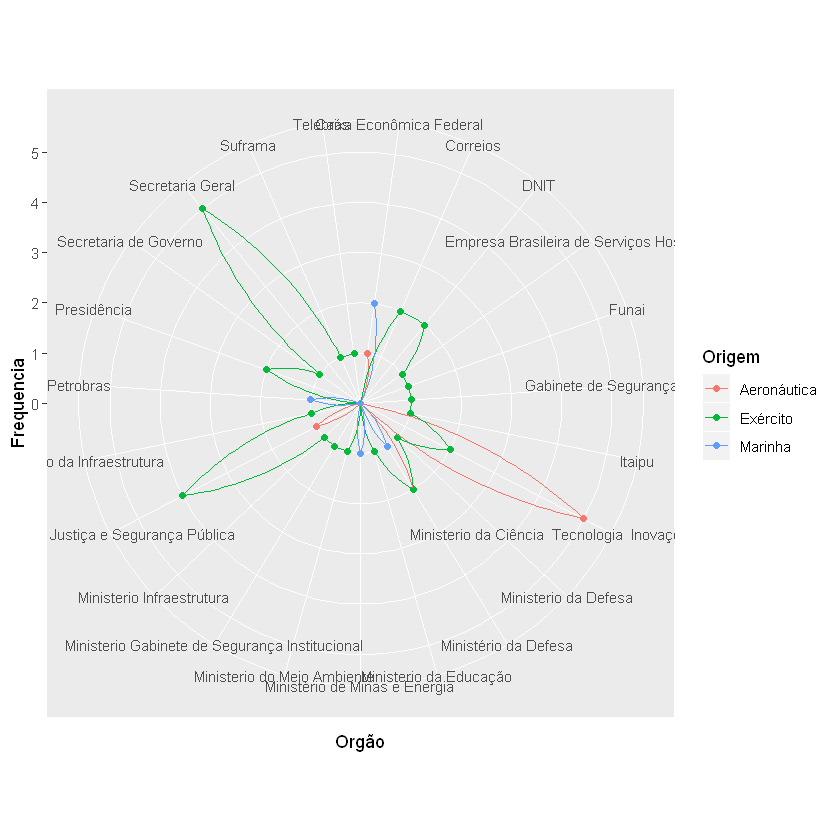

In [127]:
tab <- table(tab_milit$Orgão, tab_milit$Origem)
tb = data.frame(tab)
names(tb) <- c("Orgão", "Origem", "Frequencia")

ggplot(tb, aes(x = Orgão, y = Frequencia, col = Origem, group = Origem)) + 
    geom_point() + 
    geom_line() + 
    coord_polar()

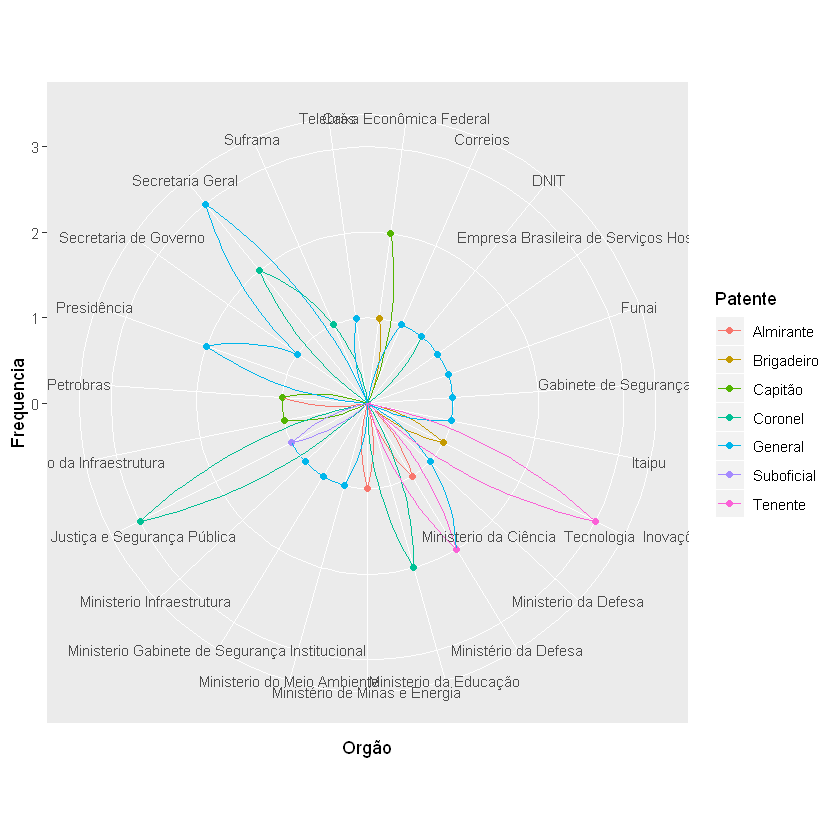

In [130]:
tab <- table(tab_milit$Orgão, tab_milit$Patente)
tb = data.frame(tab)
names(tb) <- c("Orgão", "Patente", "Frequencia")

ggplot(tb, aes(x = Orgão, y = Frequencia, col = Patente, group = Patente)) + 
    geom_point() + 
    geom_line() + 
    coord_polar()

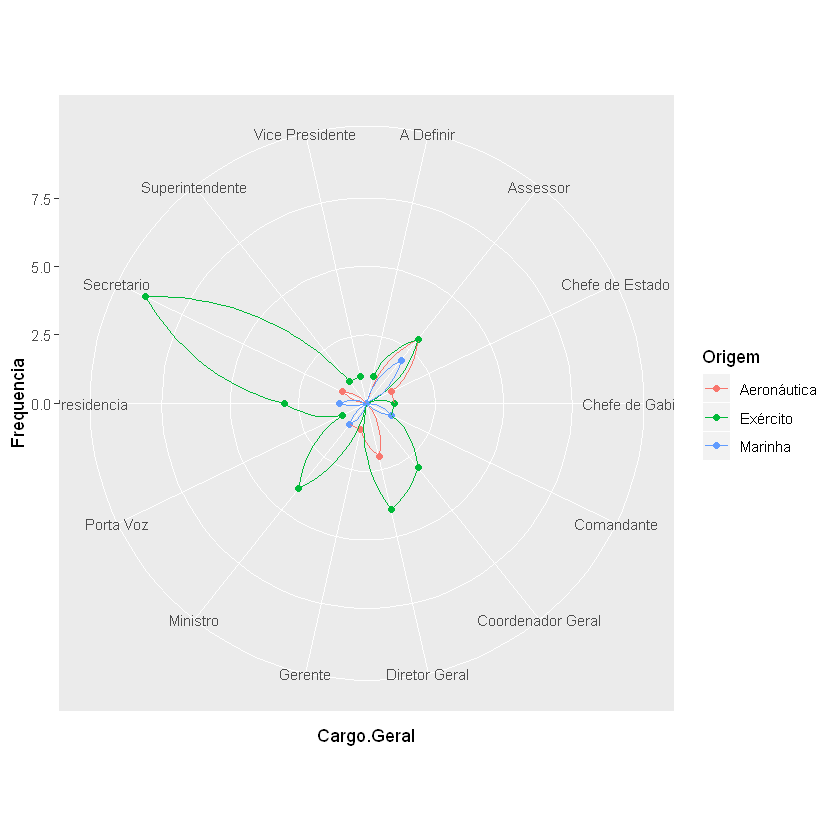

In [131]:
tab <- table(tab_milit$Cargo.Geral, tab_milit$Origem)
tb = data.frame(tab)
names(tb) <- c("Cargo.Geral", "Origem", "Frequencia")

ggplot(tb, aes(x = Cargo.Geral, y = Frequencia, col = Origem, group = Origem)) + 
    geom_point() + 
    geom_line() + 
    coord_polar()

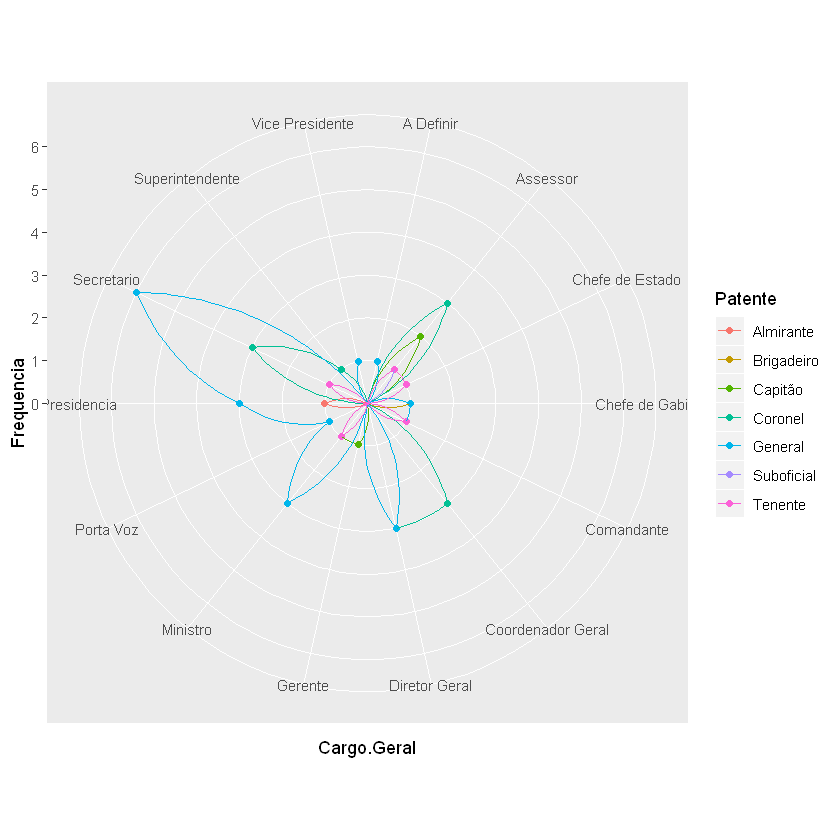

In [203]:
tab <- table(tab_milit$Cargo.Geral, tab_milit$Patente)
tb = data.frame(tab)
names(tb) <- c("Cargo.Geral", "Patente", "Frequencia")

ggplot(tb, aes(x = Cargo.Geral, y = Frequencia, col = Patente, group = Patente)) + 
    geom_point() + 
    geom_line() + 
    coord_polar()

In [204]:
tab_milit

Nome,Patente,Origem,Orgão,Cargo,Cargo.Geral
Marcos Perdigão Bernardes,Capitão,Marinha,Caixa Econômica Federal,Assessor,Assessor
Mozart de Oliveira Farias,Brigadeiro,Aeronáutica,Caixa Econômica Federal,Assessor da presidência,Assessor
Almir Alves Junior,Capitão,Marinha,Caixa Econômica Federal,Assessor,Assessor
Juarez Aparecido de Paula Cunha,General,Exército,Correios,Presidente,Presidencia
André Luis Vieira,Coronel,Exército,Correios,Assessor especial,Assessor
Antônio Leite dos Santos Filho,General,Exército,DNIT,Diretor geral,Diretor Geral
André Kuhn,Coronel,Exército,DNIT,Diretor executivo,Diretor Geral
Oswaldo Ferreira,General,Exército,Empresa Brasileira de Serviços Hospitalares,Presidente,Presidencia
Franklimberg Ribeiro de Freitas,General,Exército,Funai,Presidente,Presidencia
Eduardo Villas Bôas,General,Exército,Gabinete de Segurança Institucional,A definir,A Definir
